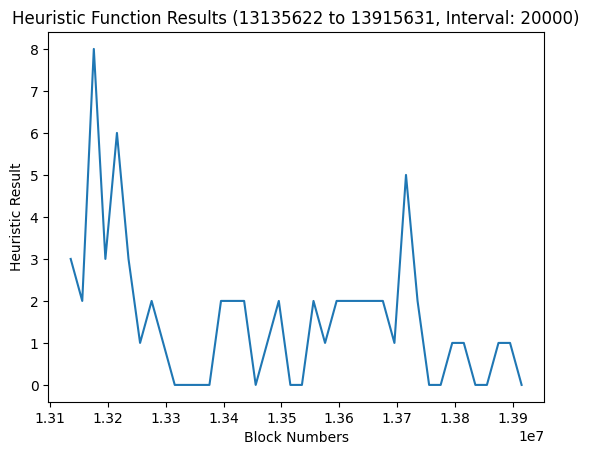

In [24]:
from web3 import Web3
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

NODE_PROVIDER = 'https://eth-mainnet.g.alchemy.com/v2/7s0nlb02rkkhdjj6su89JmyHVFgsm6kW'

# validated on 31/8/2021
START_BLOCK = 13135622

# validated on 1/1/2022
END_BLOCK = 13915631

w3 = Web3(Web3.HTTPProvider(NODE_PROVIDER))


In [25]:
approvals = w3.eth.get_logs({
    'fromBlock': START_BLOCK,
    'toBlock': END_BLOCK,
    'topics': [
        '0x8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925'
    ],
    'address': '0x4b92d19c11435614CD49Af1b589001b7c08cD4D5'
})

In [42]:
approvals_df = pd.DataFrame(approvals)
grouped_df = approvals_df.groupby(approvals_df['topics'].str[2]).size().reset_index(name='count')
grouped_df['topics'] = grouped_df['topics'].apply(lambda x: x.hex())
grouped_df

,topics,count
0,0x000000000000000000000000155482d1e2cb09093333...,6
1,0x0000000000000000000000001fcdb04d0c5364fbd92c...,31
2,0x00000000000000000000000027fb47b9fb32b9cf660c...,37
3,0x000000000000000000000000825218bed8be0b30be39...,82
4,0x00000000000000000000000091d65d67fc573605bcb0...,2
5,0x000000000000000000000000b6ea1d3fb9100a2cf166...,11


In [41]:
    x_values = []
    y_values = []

    current_block = start_block
    while current_block <= end_block:
        x_values.append(current_block)
        y_values.append(heuristic(current_block, current_block + interval))

        current_block += interval

    plt.plot(x_values, y_values)
    plt.xlabel('Block Numbers')
    plt.ylabel('Heuristic Result')
    plt.title(f'Heuristic Function Results ({start_block} to {end_block}, Interval: {interval})')
    plt.show()

,address,blockHash,blockNumber,data,logIndex,removed,topics,transactionHash,transactionIndex
0,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'\xac\xfd\xe5\x86\xb0]5T\xb9\xeeu\xc9\xdcO\xc...,13137909,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,14,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'\x9d\x98\xfc\xdd\xc0\x8f\xae\xac\nw\xa1j%\xd...,5
1,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'}\x8b=\xc8\xae^\xff<\xec\x91\xb8\x1f|\x01lk\...,13138156,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,102,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'1\xc2.m\xb2V\xefHK\xbd\x18.\xb1j\xa0\xe6^<u\...,76
2,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'~ \xf9\xf0\xc1\x8e\x07\\\xca\xf7*R%cZS0\x99\...,13138169,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,64,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,"b""\xb5\x97'\xe0 \x87\x9aj\xf3\x8c\x87\xc2Ju\xf...",58
3,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'D\x8bx\xe3\xb9{\xd9\xb1\x9cy/N\xd9\xac\x8d\x...,13138182,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,92,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'P%\x0bj\xb7.\xab\x02\xa52E\xf30\xb0~\x8e\xb2...,40
4,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'\x11\xfd\xa0\xe5\rn\x8d`\x0f1\x1c_\xd8!\x8a\...,13156680,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,348,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,"b""J\xa7\xec\xd5s\x84J\xf4.\xb7kt\\F\xaa\x0f\x9...",230
...,...,...,...,...,...,...,...,...,...
164,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'\xf4\xa4Z\x89V\x9b\r\x81\xc0\xcc\xd8\x84\xb8...,13830182,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,56,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'\xea/\xe1\n\xf2/\xb2\xa0\x89tq\xeb\x9bG\xcd\...,39
165,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'\x10\xceig\xab_\xd4\x05\x11\xbfc\x0f\x1ff\xb...,13884658,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,97,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'\xfc\x87\x8f+\xf7\xc2_O~\x96c\xce\x17;\xc9\x...,69
166,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'F\xa7E\xf85\x9b\t\x1aX\x14\xc3 ?\x02\x15;\xe...,13894928,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,421,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'\x8bt<im\xebb\xfcS\x0e~M\xe6x\x913*\xdb\x13a...,375
167,0x4b92d19c11435614CD49Af1b589001b7c08cD4D5,b'\x0b{\x98\xfe\x02R\xb2-\x06\xf1X`G\xc3\t\\\x...,13896388,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...,255,False,[b'\x8c[\xe1\xe5\xeb\xec}[\xd1OqB}\x1e\x84\xf3...,b'\xfd\x9b\xd5/\xb7\x84\x9f\x80S\xbc\xc4\xf1\x...,174
